In [628]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import itertools
from IPython.display import display

In [629]:
# Read data from .csv files 

loc = "voetbal_new/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

In [630]:
# function to remove duplicates 
def Duplicates(rawName , colName: str, previousName: str, newName: str ):
        if colName == "club":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
                rawName["team"].replace({previousName: newName }, inplace=True)
        elif colName == "match":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
        elif colName == "card": 
                rawName["type"].replace({previousName: newName }, inplace=True)
        else:
                print("nothing")

In [631]:
# function used to get the last season
def toOneSeason(season):
    return season[5:len(season)]

# Goals

In [632]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# to check the duplicates teams
ids = label.fit_transform(raw_goals_file['home'])
mappingHome = dict(zip(label.classes_, range(len(label.classes_))))

In [633]:
Duplicates(raw_goals_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_goals_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_goals_file, "club", "vitesse", "vitesse-arnheim")
Duplicates(raw_goals_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_goals_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_goals_file, "club", "sbv-excelsior", "excelsior-rotterdam")
Duplicates(raw_goals_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_goals_file, "club", "fc-twente", "twente-enschede")
Duplicates(raw_goals_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")

# raw_goals_file["type"].replace({None: "no type"}, inplace=True)
raw_goals_file["type"].replace({"Schot met rechts": "Right shot"}, inplace=True)
raw_goals_file["type"].replace({"Kopbal": "Header"}, inplace=True)
raw_goals_file["type"].replace({"Schot met links": "Left shot"}, inplace=True)
raw_goals_file["type"].replace({"Eigen goal": "Own goal"}, inplace=True)
raw_goals_file["type"].replace({"dir. vrije trap": "rest"}, inplace=True) # ind. vrije trap -> rest
raw_goals_file["type"].replace({"ind. vrije trap": "rest"}, inplace=True) # ind. vrije trap -> rest
raw_goals_file["type"].replace({"Omhaal": "rest"}, inplace=True)  # Omhaal -> rest
raw_goals_file["type"].replace({"Hakbal": "rest"}, inplace=True)  # Hakbal -> rest
raw_goals_file.dropna()

,Unnamed: 0,saison,round,home,away,team,player,assist,type,new_score,minute
326,326,1956-1957,30,fortuna-54,ajax-amsterdam,ajax-amsterdam,Wim Bleijenberg,Piet van der Kuil,Header,0:1,3
687,687,1956-1957,6,roda-jc-kerkrade,ajax-amsterdam,ajax-amsterdam,Piet van der Kuil,Gé van Dijk,Header,0:1,32
800,800,1956-1957,2,sparta-rotterdam,ajax-amsterdam,ajax-amsterdam,Wim Bleijenberg,Loek den Edel,Header,1:2,71
1200,74,1957-1958,28,ajax-amsterdam,fc-den-bosch,ajax-amsterdam,Wim Bleijenberg,Loek den Edel,Header,1:1,29
1225,99,1957-1958,3,ajax-amsterdam,psv-eindhoven,ajax-amsterdam,Willy Schmidt,Sjaak Swart,Header,1:2,83
...,...,...,...,...,...,...,...,...,...,...,...
60981,756,2021-2022,16,willem-ii-tilburg,cambuur-leeuwarden,willem-ii-tilburg,Godfried Roemeratoe,Anargyros Kampetsis,Left shot,1:2,90
60983,758,2021-2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Bryan Smeets,Header,0:1,17
60984,759,2021-2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Sven Mijnans,Header,0:2,28
60985,760,2021-2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Emanuel Emegha,Vito van Crooij,Header,0:3,79


In [634]:
def typeGoal(value):
    if pd.notna(value):
        return value
    else:
        return "no type"

In [635]:
groubBy_typeGoal = raw_goals_file['type'].value_counts()
groubBy_typeGoal

Right shot    3655
Penalty       3533
Header        2761
Left shot     2079
Own goal      1146
rest           696
Name: type, dtype: int64

In [636]:
def firstGoal(col: str):
    return raw_goals_file[col].loc[(raw_goals_file['new_score']== '1:0') | (raw_goals_file['new_score'] == '0:1')]

In [637]:
df_goals = pd.DataFrame()
season = firstGoal("saison")
round =  firstGoal("round")
home =  firstGoal("home")
away = firstGoal("away")
minute = firstGoal("minute")
first_goal = firstGoal("new_score")


df_goals['season'] = season
df_goals['round'] = round
df_goals['home'] = home
df_goals['away'] = away
df_goals['minute'] = minute
df_goals['first_goal'] = first_goal

df_goals.loc[(df_goals["first_goal"] == "1:0"), "first_goal"] = "home"
df_goals.loc[(df_goals["first_goal"] == "0:1"), "first_goal"] = "away"

df_goals['season'] = df_goals['season'].apply(toOneSeason)
df_goals['season'] = df_goals['season'].astype(int)
df_goals

,season,round,home,away,minute,first_goal
0,1957,16,ajax-amsterdam,bvc-amsterdam,27,home
5,1957,27,ajax-amsterdam,fc-den-bosch,20,home
6,1957,15,ajax-amsterdam,fc-utrecht,28,home
9,1957,25,ajax-amsterdam,feyenoord-rotterdam,62,home
10,1957,13,ajax-amsterdam,fortuna-54,20,away
...,...,...,...,...,...,...
60972,2022,7,willem-ii-tilburg,psv-eindhoven,20,home
60975,2022,21,willem-ii-tilburg,rkc-waalwijk,8,home
60979,2022,16,willem-ii-tilburg,cambuur-leeuwarden,49,away
60983,2022,12,willem-ii-tilburg,sparta-rotterdam,17,away


# Matches

In [638]:
raw_matches_file

,Unnamed: 0,saison,round,home,away,date,time,home_score,away_score,stadium,...,home_first_card,home_last_card,away_first_card,away_last_card,home_yellow,home_red,home_yelred,away_yellow,away_red,away_yelred
0,0,1956-1957,16,afc-ajax,bvc-amsterdam,"Zondag, 6. Januari 1957",NaN,2,3,de-meer-amsterdam,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1956-1957,27,afc-ajax,fc-den-bosch,"Zondag, 31. Maart 1957",NaN,1,0,de-meer-amsterdam,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1956-1957,15,afc-ajax,fc-utrecht,"Zondag, 30. December 1956",NaN,1,2,de-meer-amsterdam,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1956-1957,25,afc-ajax,feyenoord,"Zondag, 17. Maart 1957",NaN,1,0,de-meer-amsterdam,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1956-1957,13,afc-ajax,fortuna-54,"Zondag, 16. December 1956",NaN,0,2,de-meer-amsterdam,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,301,2021-2022,21,willem-ii,rkc-waalwijk,"Zondag, 6. Februari 2022",14:30 uur,3,1,koning-willem-ii-stadion-tilburg,...,NaN,NaN,65.0,86.0,0.0,0.0,0.0,2.0,0.0,0.0
19926,302,2021-2022,16,willem-ii,sc-cambuur,"Vrijdag, 10. December 2021",20:00 uur,1,3,koning-willem-ii-stadion-tilburg,...,49.0,49.0,64.0,64.0,1.0,0.0,0.0,1.0,0.0,0.0
19927,303,2021-2022,25,willem-ii,sc-heerenveen,"Zaterdag, 5. Maart 2022",16:30 uur,0,0,koning-willem-ii-stadion-tilburg,...,71.0,90.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0
19928,304,2021-2022,12,willem-ii,sparta-rotterdam,"Zaterdag, 6. November 2021",20:00 uur,0,3,koning-willem-ii-stadion-tilburg,...,26.0,26.0,19.0,77.0,1.0,0.0,0.0,3.0,0.0,0.0


In [639]:
#Function used for the matches:
# 1 means that home team is the winner 
# -1 means that home team is the loser
# 0 means that home team tied with the away team
def ClassifyMatches(row):
    if(row.home_score > row.away_score):
        return 1
    elif(row.home_score < row.away_score):
        return -1
    else:
        return 0

In [640]:
# to check the duplicates
ids = label.fit_transform(raw_matches_file['home'])
mappingHome = dict(zip(label.classes_, range(len(label.classes_))))

In [641]:
Duplicates(raw_matches_file, "match", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_matches_file, "match", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_matches_file, "match", "vitesse", "vitesse-arnheim")
Duplicates(raw_matches_file, "match", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_matches_file, "match", "mvv", "mvv-maastricht")
Duplicates(raw_matches_file, "match", "sbv-excelsior", "excelsior-rotterdam")
Duplicates(raw_matches_file, "match", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_matches_file, "match", "fc-twente", "twente-enschede")
Duplicates(raw_matches_file, "match", "go-ahead-eagles_2", "go-ahead-eagles")
raw_matches_file["away_score"].replace({"2 Toeg.": "0"}, inplace=True)
raw_matches_file["away_score"].replace({"-": "0"}, inplace=True)
raw_matches_file["away_score"].replace({"- niet gespeeld": "0"}, inplace=True)
raw_matches_file["home_score"].replace({"-": "0"}, inplace=True)
raw_matches_file['away_score'] = raw_matches_file['away_score'].astype(int)
raw_matches_file['home_score'] = raw_matches_file['home_score'].astype(int)

In [642]:
df_matches = pd.DataFrame()
season = raw_matches_file["saison"]
round =  raw_matches_file["round"]
home =  raw_matches_file["home"]
away = raw_matches_file["away"]
home_score = raw_matches_file["home_score"]
away_score = raw_matches_file["away_score"]
stadium = raw_matches_file['stadium']

df_matches['season'] = season
df_matches['round'] = round
df_matches['home'] = home
df_matches['away'] = away
df_matches['home_score'] = home_score
df_matches['away_score'] = away_score
df_matches['winning_team'] = df_matches.apply(lambda row: ClassifyMatches(row),axis=1)
df_matches['total_goals'] = home_score + away_score
df_matches['stadium'] = stadium


df_matches['season'] = df_matches['season'].apply(toOneSeason)
df_matches['season'] = df_matches['season'].astype(int)

df_matches

,season,round,home,away,home_score,away_score,winning_team,total_goals,stadium
0,1957,16,ajax-amsterdam,bvc-amsterdam,2,3,-1,5,de-meer-amsterdam
1,1957,27,ajax-amsterdam,fc-den-bosch,1,0,1,1,de-meer-amsterdam
2,1957,15,ajax-amsterdam,fc-utrecht,1,2,-1,3,de-meer-amsterdam
3,1957,25,ajax-amsterdam,feyenoord-rotterdam,1,0,1,1,de-meer-amsterdam
4,1957,13,ajax-amsterdam,fortuna-54,0,2,-1,2,de-meer-amsterdam
...,...,...,...,...,...,...,...,...,...
19925,2022,21,willem-ii-tilburg,rkc-waalwijk,3,1,1,4,koning-willem-ii-stadion-tilburg
19926,2022,16,willem-ii-tilburg,cambuur-leeuwarden,1,3,-1,4,koning-willem-ii-stadion-tilburg
19927,2022,25,willem-ii-tilburg,sc-heerenveen,0,0,0,0,koning-willem-ii-stadion-tilburg
19928,2022,12,willem-ii-tilburg,sparta-rotterdam,0,3,-1,3,koning-willem-ii-stadion-tilburg


# Merge Goals and Matches 

In [643]:
df_merge= pd.merge(df_goals,df_matches,how='inner',left_on=['season','round','home', 'away'],right_on=['season','round','home', 'away'])
df_merge['home_score'] = df_merge['home_score'].astype(int)
df_merge['away_score'] = df_merge['away_score'].astype(int)
df_merge.tail(10)

,season,round,home,away,minute,first_goal,home_score,away_score,winning_team,total_goals,stadium
18432,2022,1,willem-ii-tilburg,feyenoord-rotterdam,17,away,0,4,-1,4,koning-willem-ii-stadion-tilburg
18433,2022,10,willem-ii-tilburg,fortuna-sittard,54,away,1,1,0,2,koning-willem-ii-stadion-tilburg
18434,2022,14,willem-ii-tilburg,go-ahead-eagles,47,away,0,1,-1,1,koning-willem-ii-stadion-tilburg
18435,2022,18,willem-ii-tilburg,nec-nijmegen,38,away,0,1,-1,1,koning-willem-ii-stadion-tilburg
18436,2022,3,willem-ii-tilburg,pec-zwolle,53,home,1,0,1,1,koning-willem-ii-stadion-tilburg
18437,2022,7,willem-ii-tilburg,psv-eindhoven,20,home,2,1,1,3,koning-willem-ii-stadion-tilburg
18438,2022,21,willem-ii-tilburg,rkc-waalwijk,8,home,3,1,1,4,koning-willem-ii-stadion-tilburg
18439,2022,16,willem-ii-tilburg,cambuur-leeuwarden,49,away,1,3,-1,4,koning-willem-ii-stadion-tilburg
18440,2022,12,willem-ii-tilburg,sparta-rotterdam,17,away,0,3,-1,3,koning-willem-ii-stadion-tilburg
18441,2022,30,willem-ii-tilburg,vitesse-arnheim,4,home,1,0,1,1,koning-willem-ii-stadion-tilburg


## Data Visualization

<p> Below two graphs can be found, showcasing what is more likely to happen if the home_team or the away_team scores the first goal. </p>
<p> In order to ease the process, the graphs show the home_team.</p>
<p> These graphs are used to check if our prediction is accurate or not.</p>

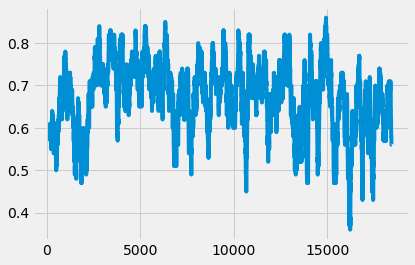

In [644]:
df_plot = df_merge[(df_merge['first_goal']=="home")]
ax = df_plot["winning_team"].rolling(100).mean().plot() 

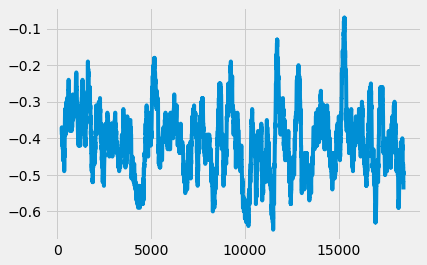

In [645]:
df_plot = df_merge[(df_merge['first_goal']=="away")]

ax = df_plot["winning_team"].rolling(100).mean().plot()

<AxesSubplot:title={'center':'Top 10 teams - HOME'}, xlabel='home'>

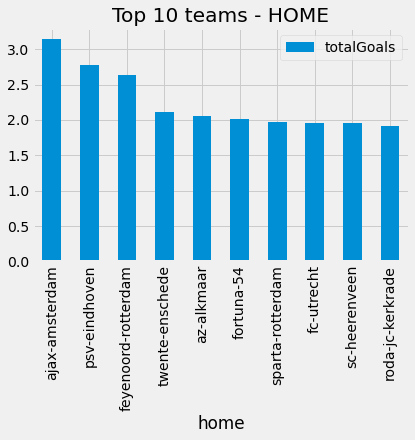

In [646]:
group_home = df_merge.groupby('home').agg(totalGoals = ('home_score', 'mean'))
group_home.sort_values(by=['totalGoals'], inplace=True, ascending=False)
df_plot = pd.DataFrame(group_home['totalGoals'].nlargest(n=10)) 
df_plot.plot(kind="bar", title = "Top 10 teams - HOME")

<AxesSubplot:title={'center':'Top 10 teams - AWAY'}, xlabel='away'>

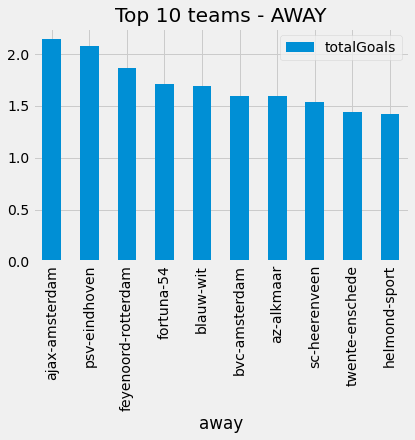

In [647]:
group_away = df_merge.groupby(['away']).agg(totalGoals = ('away_score', 'mean'))
group_away.sort_values(by=['totalGoals'], inplace=True, ascending=False)
df_plot = pd.DataFrame(group_away['totalGoals'].nlargest(n=10)) 
df_plot.plot(kind="bar", title = "Top 10 teams - AWAY")

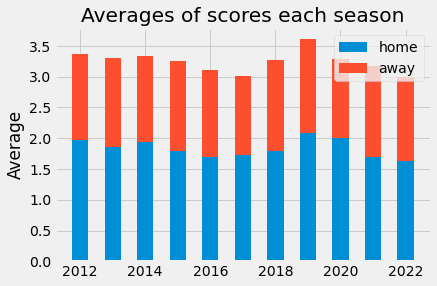

In [648]:
df_last10_season = df_merge[df_merge["season"] >= 2012]

groupBy_season = df_last10_season.groupby('season', as_index=False).agg(home_score_mean = ('home_score', 'mean'),
                                                                        away_score_mean = ('away_score', 'mean'))
labels = groupBy_season['season']
home_means = groupBy_season['home_score_mean']
away_means = groupBy_season['away_score_mean']
width = 0.50    

fig, ax = plt.subplots()

ax.bar(labels, home_means, width, label='home')
ax.bar(labels, away_means, width, bottom=home_means,
       label='away')

ax.set_ylabel('Average')
ax.set_title('Averages of scores each season')
ax.legend()

plt.show()

Text(0, 0.5, 'Averages')

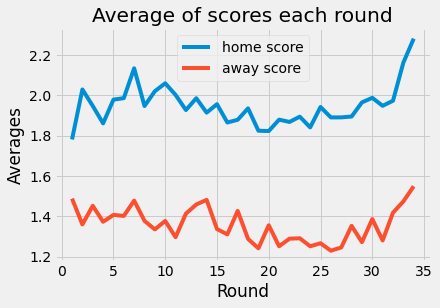

In [649]:
df_filter_round = df_merge[df_merge["round"] <= 34]
groubBy_homeScore_EachRound = df_filter_round.groupby('round', as_index=False).agg(home_score_mean = ('home_score', 'mean'),
                                                                away_score_mean = ('away_score', 'mean'))

plt.plot(groubBy_homeScore_EachRound['round'], groubBy_homeScore_EachRound['home_score_mean'], label="home score")
plt.plot(groubBy_homeScore_EachRound['round'], groubBy_homeScore_EachRound['away_score_mean'], label="away score")
plt.legend()
plt.title("Average of scores each round")
plt.xlabel("Round")
plt.ylabel("Averages")

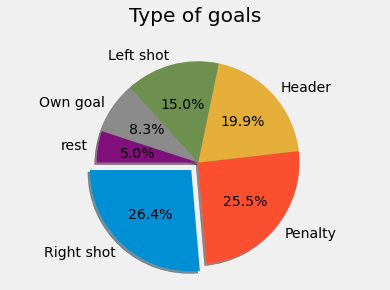

In [650]:

labels = groubBy_typeGoal.index
sizes = groubBy_typeGoal
explode = (0.1, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal') 
ax1.set_title("Type of goals\n")

plt.show()

Text(0, 0.5, 'winning team')

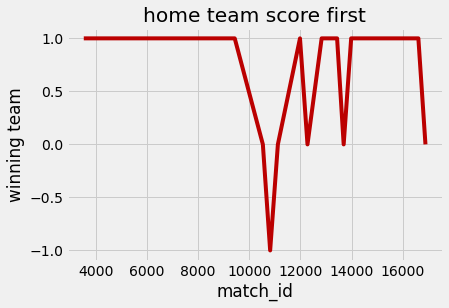

In [651]:
df_plot = pd.DataFrame()
season = df_merge['season']
home = df_merge['home']
away = df_merge['away']
winning_team = df_merge['winning_team']
first_goal = df_merge["first_goal"]
df_plot['season'] = season
df_plot['home'] = home
df_plot['away'] = away
df_plot['winning_team'] = winning_team
df_plot['first_goal'] = first_goal

df_filter_last_game = df_plot[(df_plot['home'] == "fc-utrecht") & (df_plot['away'] == "nec-nijmegen") ]
df_home_team_scoreFirst = df_filter_last_game[df_filter_last_game['first_goal'] == "home"]

ax = df_home_team_scoreFirst["winning_team"].rolling(1).mean().plot(title='home team score first', color = '#BB0000')
ax.set_xlabel("match_id")
ax.set_ylabel("winning team")

Text(0, 0.5, 'winning team')

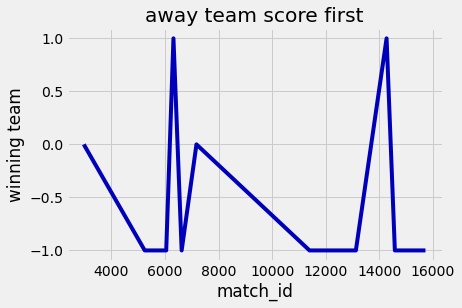

In [652]:
df_away_team_scoreFirst = df_filter_last_game[df_filter_last_game['first_goal'] == "away"]

ax = df_away_team_scoreFirst["winning_team"].rolling(1).mean().plot(title='away team score first', color= "#0000BB")
ax.set_xlabel("match_id")
ax.set_ylabel("winning team")

Text(0, 0.5, 'Averages')

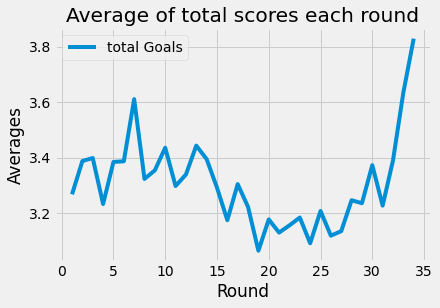

In [653]:
df_filter_round = df_merge[df_merge["round"] <= 34]
groubBy_totalGoals_EachRound = df_filter_round.groupby('round', as_index=False).agg(totalGoals = ('total_goals', 'mean'))

plt.plot(groubBy_totalGoals_EachRound['round'], groubBy_totalGoals_EachRound['totalGoals'], label="total Goals")
plt.legend()
plt.title("Average of total scores each round")
plt.xlabel("Round")
plt.ylabel("Averages")

Text(0, 0.5, 'Averages')

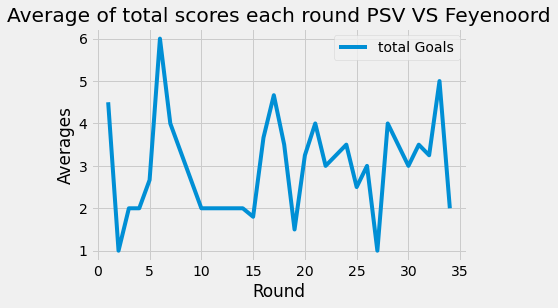

In [654]:
# feyenoord-rotterdam Vs psv-eindhoven in Rotterdam 
df_feyVsPsv_filter_round = df_merge[(df_merge["round"] <= 34) & (df_merge["home"] == "feyenoord-rotterdam") & (df_merge["away"] == "psv-eindhoven")]
groubBy_feyVsPsv_totalGoals_EachRound = df_feyVsPsv_filter_round.groupby('round', as_index=False).agg(totalGoals = ('total_goals', 'mean'))

plt.plot(groubBy_feyVsPsv_totalGoals_EachRound['round'], groubBy_feyVsPsv_totalGoals_EachRound['totalGoals'], label="total Goals")
plt.legend()
plt.title("Average of total scores each round PSV VS Feyenoord")
plt.xlabel("Round")
plt.ylabel("Averages")

Text(0, 0.5, 'Averages')

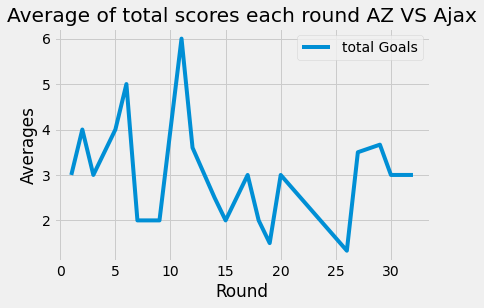

In [655]:
# AZ Alkamaar Vs ajax-amsterdam in Alkamaar 
df_AzVsAjax_filter_round = df_merge[(df_merge["round"] <= 34) & (df_merge["home"] == "az-alkmaar") & (df_merge["away"] == "ajax-amsterdam")]
groubBy_AzVsAjax_totalGoals_EachRound = df_AzVsAjax_filter_round.groupby('round', as_index=False).agg(totalGoals = ('total_goals', 'mean'))

plt.plot(groubBy_AzVsAjax_totalGoals_EachRound['round'], groubBy_AzVsAjax_totalGoals_EachRound['totalGoals'], label="total Goals")
plt.legend()
plt.title("Average of total scores each round AZ VS Ajax")
plt.xlabel("Round")
plt.ylabel("Averages")

# Prediction 

### First Goal

In [656]:
df_prediction = pd.DataFrame()
season = df_merge["season"]
round =  df_merge["round"]
home =  df_merge["home"]
away = df_merge["away"]
first_goal = df_merge["first_goal"]
home_score = df_merge["home_score"]
away_score = df_merge["away_score"]
winning_team = df_merge["winning_team"]
stadium = df_merge["stadium"]

df_prediction['season'] = season
df_prediction['round'] = round
df_prediction['home'] = home
df_prediction['away'] = away
df_prediction["first_goal"] = first_goal
df_prediction['home_score'] = home_score
df_prediction['away_score'] = away_score
df_prediction["winning_team"] = winning_team
df_prediction["total_goals"] = home_score + away_score
df_prediction["stadium"] = stadium

In [657]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

label = LabelEncoder()

In [658]:
ids = label.fit_transform(df_merge['stadium'])
mappingHome = dict(zip(label.classes_, range(len(label.classes_))))
print(list(mappingHome.keys())[list(mappingHome.values()).index(2)])
print("-----------------------------------------------------------")

df_prediction["home"] = label.fit_transform(df_prediction['home'])
df_prediction["away"] = label.fit_transform(df_prediction['away'])
df_prediction["stadium"] = label.fit_transform(df_prediction['stadium'])
df_prediction["first_goal"] = label.fit_transform(df_prediction['first_goal'])

print(mappingHome)

alkmaarderhout-alkmaar
-----------------------------------------------------------
{'abe-lenstra-stadion-heerenveen': 0, 'afas-stadion-alkmaar': 1, 'alkmaarderhout-alkmaar': 2, 'buko-stadion-velsen': 3, 'cambuur-stadion-leeuwarden': 4, 'cars-jeans-stadion-den-haag': 5, 'de-adelaarshorst-deventer': 6, 'de-baandert-sittard': 7, 'de-geusselt-maastricht': 8, 'de-goffert-nijmegen': 9, 'de-grolsch-veste-enschede': 10, 'de-koel-venlo': 11, 'de-kuip-rotterdam': 12, 'de-langeleegte-veendam': 13, 'de-meer-amsterdam': 14, 'de-oude-meerdijk-emmen': 15, 'de-vijverberg-doetinchem': 16, 'de-vliert-s-hertogenbosch': 17, 'diekman-enschede': 18, 'erve-asito-almelo': 19, 'euroborg-groningen': 20, 'fortuna-sittard-stadion-sittard': 21, 'galgenwaard-1936-1981-utrecht': 22, 'gelredome-arnhem': 23, 'gemeentelijk-sportpark-bornsestaat-almelo': 24, 'gemeentelijk-sportpark-tilburg-tilburg': 25, 'haarlem-stadion-haarlem': 26, 'herstaco-stadion-roosendaal': 27, 'het-kasteel-rotterdam': 28, 'jan-louwers-eindhoven'

In [659]:
X = df_prediction[["home","away","first_goal"]]
y = df_prediction["winning_team"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [660]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.6335050149091895

In [661]:
# 0 away scores first 
# 1 home scores first
clf.predict([[31, 16, 1]]) # PEC Zwolle Vs FC Utrecht in zwolle 

array([0], dtype=int64)

In [662]:
clf.predict([[3, 2, 0]]) # AZ Alkamaar Vs ajax-amsterdam in Alkamaar 

array([-1], dtype=int64)

In [663]:
clf.predict([[19, 32, 1]]) # feyenoord-rotterdam Vs psv-eindhoven in Rotterdam 

array([1], dtype=int64)

### Winning team

In [664]:
X1 = df_prediction[["home","away"]]
y1 = df_prediction["winning_team"]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=1)

In [665]:
clf1 = tree.DecisionTreeClassifier()

clf1.fit(X_train,y_train)

clf1.score(X_test,y_test)

0.5155868799132556

In [666]:
clf1.predict([[31, 16]]) # PEC Zwolle Vs FC Utrecht in zwolle 

array([0], dtype=int64)

In [667]:
clf1.predict([[3, 2]]) # AZ Alkamaar Vs ajax-amsterdam in Alkamaar 

array([-1], dtype=int64)

In [668]:
clf1.predict([[19, 32]]) # feyenoord-rotterdam Vs psv-eindhoven in Rotterdam 

array([1], dtype=int64)

### Total Goals in the match

In [674]:
from sklearn.linear_model import LinearRegression
X2 = df_prediction[["home","away"]]
y2 = df_prediction["total_goals"]
reg = LinearRegression().fit(X2, y2)
acc= reg.score(X2, y2)
print(acc)
coe = reg.coef_
inter = reg.intercept_
reg.predict([[31, 16]])

0.0013138929448867076


array([3.30104225])

In [670]:
reg.predict([[19, 32]]) # feyenoord-rotterdam Vs psv-eindhoven in Rotterdam 

array([3.30743111])

In [675]:
inter

3.461150637072264